# Solution `geopandas` & `cartopy`

Take the following code snippet as a starting point. It loads the NUTS regions of Europe, the power plant dataset, and a shapefile for the Danish [Natura2000](https://en.wikipedia.org/wiki/Natura_2000) natural protection areas.

```python
import cartopy
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

url = "https://tubcloud.tu-berlin.de/s/RHZJrN8Dnfn26nr/download/NUTS_RG_10M_2021_4326.geojson"
nuts = gpd.read_file(url)

fn = "https://raw.githubusercontent.com/PyPSA/powerplantmatching/master/powerplants.csv"
df = pd.read_csv(fn, index_col=0)
geometry = gpd.points_from_xy(df["lon"], df["lat"])
ppl = gpd.GeoDataFrame(df, geometry=geometry, crs=4326)

url = "https://tubcloud.tu-berlin.de/s/mEpdmgBtmMbyjAr/download/Natura2000_end2021-DK.gpkg"
natura = gpd.read_file(url)
```

In [1]:
import cartopy
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

url = "https://tubcloud.tu-berlin.de/s/RHZJrN8Dnfn26nr/download/NUTS_RG_10M_2021_4326.geojson"
nuts = gpd.read_file(url)

fn = "https://raw.githubusercontent.com/PyPSA/powerplantmatching/master/powerplants.csv"
df = pd.read_csv(fn, index_col=0)
geometry = gpd.points_from_xy(df["lon"], df["lat"])
ppl = gpd.GeoDataFrame(df, geometry=geometry, crs=4326)

url = "https://tubcloud.tu-berlin.de/s/mEpdmgBtmMbyjAr/download/Natura2000_end2021-DK.gpkg"
natura = gpd.read_file(url)

**Task 1:** Identify the coordinate reference system of the `natura` GeoDataFrame.

In [2]:
natura.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

**Task 2:** Plot the `natura` GeoDataFrame on a map without transforming its CRS. Use `cartopy` for setting the projection of the figure and add coastlines and borders.

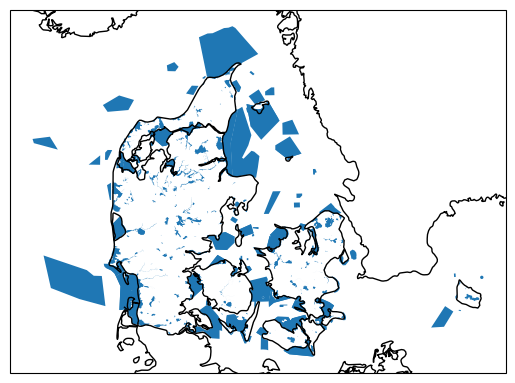

In [3]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.epsg(3035))
natura.plot(ax=ax)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS);

**Task 3:** Identify the name of the largest protected area in the `natura` GeoDataFrame.

In [4]:
i = natura.area.idxmax()
natura.loc[i, "SITENAME"]

'Skagens Gren og Skagerak'

**Task 4:** What is the total protection area in square kilometers.

In [5]:
natura.dissolve().area.iloc[0] / 1e6

np.float64(22646.37570082661)

**Task 5:** The `natura` GeoDataFrame has a column `SITETYPE` that indicates the type of protected area. Calculate the total area for each type of protected area (again in square kilometers).

In [6]:
natura.dissolve("SITETYPE").area / 1e6

SITETYPE
A    11751.536465
B    16632.563873
C     3037.541735
dtype: float64

**Task 6:** By how much (in percent) would the total area of protected areas increase if a buffer of 1 km around each protected area were also protected?

In [7]:
original_area = natura.dissolve().area.div(1e6).iloc[0]

In [8]:
expanded_area = (
    gpd.GeoDataFrame(geometry=natura.buffer(1000)).dissolve().area.div(1e6).iloc[0]
)

In [9]:
expanded_area / original_area * 100 - 100

np.float64(46.43473733258506)

**Task 7:** List the power plants that are located within protected areas. How many power plants are located within protected areas? Use the [`.sjoin()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html) function. Check the result by plotting these power plants on top of the protected areas.

In [10]:
p = ppl.to_crs(natura.crs).sjoin(natura)
p

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,...,StorageCapacity_MWh,EIC,projectID,geometry,index_right,SITECODE,SITENAME,MS,SITETYPE,INSPIRE_ID
id,,,,,,,,,,,,,,,,,,,,,
6144,Sprogo Offshore Wind Farm,Wind,Offshore,PP,Denmark,21.0,NaN,2009.0,NaN,NaN,...,NaN,{nan},"{'GEM': {'G100000914988'}, 'GPD': {'WRI1030002'}}",POINT (4380645.027 3582173.5),201,DK008X190,Vresen,DK,B,Dk.nst.ps.SAC100
16450,Rens Hedegard Plantage Wind Farm,Wind,Onshore,PP,Denmark,15.0,NaN,2010.0,NaN,NaN,...,NaN,{nan},{'GEM': {'G100000913204'}},POINT (4259799.359 3531446.118),90,DK009X063,Sønder Ådal,DK,A,Dk.nst.ps.SPA63
16509,Ringkobing Skjern Solar,Solar,PV,PP,Denmark,1.0,NaN,2013.0,NaN,NaN,...,NaN,{nan},{'GEM': {'G100001008126'}},POINT (4206196.591 3673153.835),109,DK00CX161,Stadil Fjord og Vest Stadil Fjord,DK,C,Dk.nst.ps.SAC59
18958,Boss,Battery,Li,Store,Denmark,1.0,NaN,NaN,NaN,NaN,...,1.0,{nan},{'EESI': {'EESI-64169'}},POINT (4634684.769 3569011.488),11,DK007X080,"Almindingen, Ølene og Paradisbakkerne",DK,C,Dk.nst.ps.SAC162


In [11]:
len(p)

4

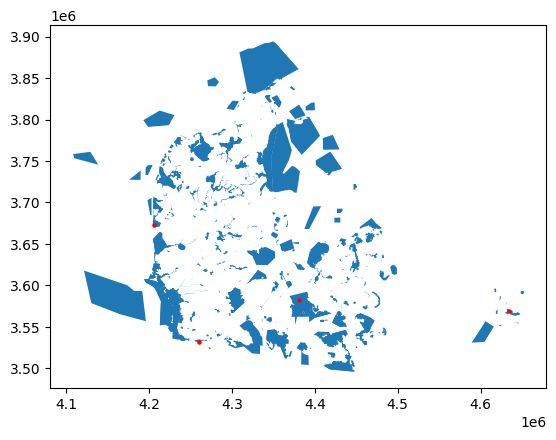

In [12]:
ax = natura.plot()
p.plot(ax=ax, color="red", markersize=5);

**Task 8 (advanced):** What fraction of the natural protection area is located offshore? Use set operations with the [`.overlay()`](https://geopandas.org/en/stable/docs/user_guide/set_operations.html#set-operations-with-overlay) function and the NUTS regions `GeoDataFrame`.

:::{note}
Consult the [GeoPandas documentation](https://geopandas.org/en/stable/docs/user_guide/index.html) if you need an introduction to how to use the `.overlay()` function.
:::

In [13]:
dk = nuts.query("LEVL_CODE == 0 and CNTR_CODE == 'DK'")

In [14]:
overlay = gpd.overlay(natura, dk.to_crs(3035))

In [15]:
onshore = overlay.dissolve().area.div(1e6).iloc[0]
total = natura.dissolve().area.div(1e6).iloc[0]

In [16]:
onshore / total * 100

np.float64(18.630060811760636)